In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.core.debugger import set_trace

/usr/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Data types

In [2]:
x = torch.ones(1, 3)
y = torch.zeros_like(x)
x+y

tensor([[1., 1., 1.]])

In [3]:
x.numpy()

array([[1., 1., 1.]], dtype=float32)

In [4]:
# define variables
xx = torch.autograd.Variable(x)
ww = torch.autograd.Variable(torch.ones(3, 1), requires_grad=True)
b = torch.autograd.Variable(torch.zeros(1), requires_grad=True)
yy = xx.mm(ww) + b
yy

tensor([[3.]], grad_fn=<AddBackward0>)

In [5]:
yy.backward()

In [6]:
torch.__version__

'1.13.1'

## Reference

* https://www.youtube.com/watch?v=l-Fe9Ekxxj4&list=PLlMkM4tgfjnJ3I-dbhO9JTw7gNty6o_2m
* https://github.com/hunkim/PyTorchZeroToAll

# Linear Model

`y = w*x`

Let's try to code this in simple python.

In [7]:
X = [1.0, 2.0, 3.0]
y_true = [2.0, 4.0, 6.0]

def forward(x, w):
    return x * w

def loss(y_true, y_pred):
    return (y_pred-y_true)**2

w = 1.0 # random weight
weights = []
losses = []
for w in np.arange(0.1, 4.1, 0.1):
    l = []
    for x, y in zip(X, y_true):
        y_pred = forward(x, w)
        l.append(loss(y, y_pred))
    lo = np.mean(l)
    weights.append(w)
    losses.append(lo)
    print(f'w={w}, loss = {lo}')

w=0.1, loss = 16.846666666666668
w=0.2, loss = 15.120000000000003
w=0.30000000000000004, loss = 13.486666666666665
w=0.4, loss = 11.946666666666667
w=0.5, loss = 10.5
w=0.6, loss = 9.146666666666667
w=0.7000000000000001, loss = 7.886666666666666
w=0.8, loss = 6.719999999999999
w=0.9, loss = 5.646666666666666
w=1.0, loss = 4.666666666666667
w=1.1, loss = 3.779999999999999
w=1.2000000000000002, loss = 2.986666666666665
w=1.3000000000000003, loss = 2.286666666666665
w=1.4000000000000001, loss = 1.6799999999999995
w=1.5000000000000002, loss = 1.1666666666666654
w=1.6, loss = 0.746666666666666
w=1.7000000000000002, loss = 0.4199999999999995
w=1.8000000000000003, loss = 0.18666666666666634
w=1.9000000000000001, loss = 0.046666666666666586
w=2.0, loss = 0.0
w=2.1, loss = 0.046666666666666835
w=2.2, loss = 0.18666666666666698
w=2.3000000000000003, loss = 0.42000000000000054
w=2.4000000000000004, loss = 0.7466666666666679
w=2.5000000000000004, loss = 1.1666666666666692
w=2.6, loss = 1.680000000

Text(0, 0.5, 'loss')

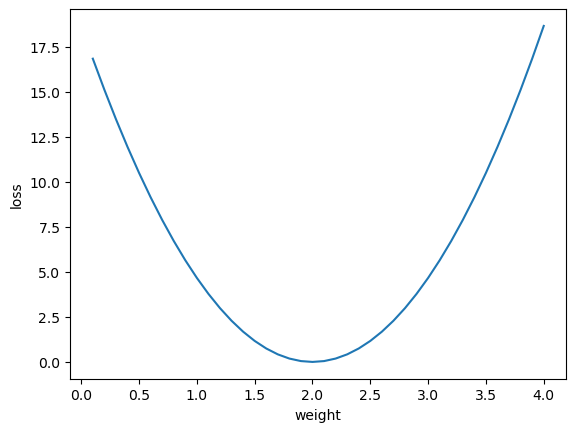

In [8]:
plt.plot(weights, losses)
plt.xlabel('weight')
plt.ylabel('loss')

## Analysis

Challenge: the above loop is bruteforce.

What we want is to find the global minima for the graph! At the minima, first derivative is 0.

Derivative of `loss` with respect to changing values of `w`. so `d(loss)/dw`.

```
loss = (y_pred-y)^2 = (x*w - y)^2
d(loss)/dw = d(x*w*x*w + y*y - 2 * x*w * y)/dw = 2*x*x*w - 2*x*y = 2*x * (x*w - y)

w' = w - lr * d(loss)/dw
```

In [9]:
X = [1.0, 2.0, 3.0]
y_true = [2.0, 4.0, 6.0]

def forward(x, w):
    return x * w

def loss(y_true, y_pred):
    return (y_pred-y_true)**2

def gradient(x, y, w):
    return 2*x*(x*w - y)

w = 1.0 # random weight
lr = 0.048
weights = []
mean_losses = []
for i in range(0, 10):
    losses = []
    gradients = []
    for x, y in zip(X, y_true):
        y_pred = forward(x, w)
        losses.append(loss(y, y_pred))
        gradients.append(gradient(x, y, w))
    l = np.mean(losses)
    g = np.mean(gradients)
    w = w - lr * g
    weights.append(w)
    mean_losses.append(l)
    print(f'epoch={i}, w={w}, g={g}, loss = {l}')

epoch=0, w=1.448, g=-9.333333333333334, loss = 4.666666666666667
epoch=1, w=1.695296, g=-5.152000000000001, loss = 1.4219520000000008
epoch=2, w=1.8318033919999999, g=-2.8439040000000007, loss = 0.43327446220800026
epoch=3, w=1.9071554723839999, g=-1.5698350080000003, loss = 0.1320204617326265
epoch=4, w=1.948749820755968, g=-0.8665489244160014, loss = 0.04022716277177834
epoch=5, w=1.9717099010572943, g=-0.47833500627763187, loss = 0.012257377405211897
epoch=6, w=1.9843838653836265, g=-0.2640409234652535, loss = 0.0037348719248777064
epoch=7, w=1.991379893691762, g=-0.1457505897528185, loss = 0.001138030414997914
epoch=8, w=1.9952417013178525, g=-0.0804543255435548, loss = 0.00034676241957151585
epoch=9, w=1.9973734191274546, g=-0.04441078770004377, loss = 0.00010565989629312637


Text(0, 0.5, 'loss')

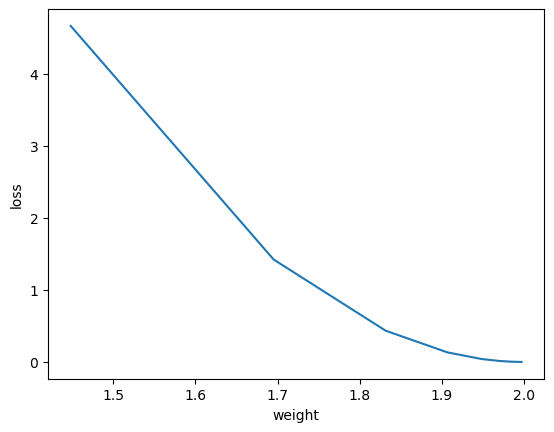

In [10]:
plt.plot(weights, mean_losses)
plt.xlabel('weight')
plt.ylabel('loss')

## Analysis

Challenge: computing gradient for non-linear functions, scaling this to thousand nodes in network. Use `autograd` from pytorch. 

In [11]:
# let's use pytorch's autograd to compute these...
X = [1.0, 2.0, 3.0]
y_true = [2.0, 4.0, 6.0]
w = torch.autograd.Variable(torch.tensor([1.0]), requires_grad=True)

def forward(x, w):
    return x * w

def loss(y_true, y_pred):
    return (y_pred-y_true)**2

lr = 0.048
weights = []
mean_losses = []
for i in range(0, 10):
    losses = []
    for x, y in zip(X, y_true):
        y_pred = forward(x, w)
        l = loss(y, y_pred)
        l.backward()
        losses.append(l.data)
        
    l = np.mean(losses)
    g = w.grad.data
    w.data = w.data - lr * g
    w.grad.data.zero_()
    
    weights.append(w.data)
    mean_losses.append(l)
    print(f'epoch={i}, w={w}, g={g}, loss = {l}')

epoch=0, w=tensor([2.3440], requires_grad=True), g=tensor([0.]), loss = 4.666666507720947
epoch=1, w=tensor([1.8817], requires_grad=True), g=tensor([0.]), loss = 0.5522342324256897
epoch=2, w=tensor([2.0407], requires_grad=True), g=tensor([0.]), loss = 0.06534925848245621
epoch=3, w=tensor([1.9860], requires_grad=True), g=tensor([0.]), loss = 0.007733169477432966
epoch=4, w=tensor([2.0048], requires_grad=True), g=tensor([0.]), loss = 0.0009151138365268707
epoch=5, w=tensor([1.9983], requires_grad=True), g=tensor([0.]), loss = 0.00010829636448761448
epoch=6, w=tensor([2.0006], requires_grad=True), g=tensor([0.]), loss = 1.2816067282983568e-05
epoch=7, w=tensor([1.9998], requires_grad=True), g=tensor([0.]), loss = 1.5162410136326798e-06
epoch=8, w=tensor([2.0001], requires_grad=True), g=tensor([0.]), loss = 1.7923821360454895e-07
epoch=9, w=tensor([2.0000], requires_grad=True), g=tensor([0.]), loss = 2.1212997580732917e-08


Text(0, 0.5, 'loss')

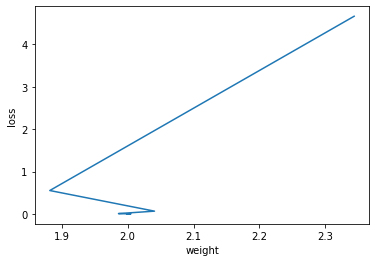

In [12]:
plt.plot(weights, mean_losses)
plt.xlabel('weight')
plt.ylabel('loss')

## Analysis

Now define a proper torch module for the same.

In [16]:
X = torch.autograd.Variable(torch.tensor([[1.0], [2.0], [3.0]]))
y = torch.autograd.Variable(torch.tensor([[2.0], [4.0], [6.0]]))

class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear = torch.nn.Linear(1, 1)
        
    def forward(self, x):
        return self.linear(x)

model = Model() 
loss = torch.nn.MSELoss(reduction='mean')
optim = torch.optim.SGD(model.parameters(), lr=0.048)
for i in range(0, 10):
    y_pred = model.forward(X)
    l = loss(y_pred, y)
    
    optim.zero_grad()
    l.backward()
    optim.step()
    print(f'epoch={i}, loss={l.data}')

epoch=0, loss=30.45906639099121
epoch=1, loss=6.692518711090088
epoch=2, loss=1.496538519859314
epoch=3, loss=0.35996514558792114
epoch=4, loss=0.11076531559228897
epoch=5, loss=0.05555591732263565
epoch=6, loss=0.042768362909555435
epoch=7, loss=0.039270490407943726
epoch=8, loss=0.03781937435269356
epoch=9, loss=0.0368313267827034


# Text models

So far so good. Let's train a slightly more complex model using Dataset etc.

In [1]:
import sys
sys.path.append("../.env/lib/python3.10/site-packages/")

In [8]:
from torchtext.datasets import IMDB

train_iter = iter(IMDB(split="train"))
next(train_iter)

# data format: <sentiment, text>

(1,
 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far betwee

In [12]:
next(train_iter)

(1,
 'Oh, brother...after hearing about this ridiculous film for umpteen years all I can think of is that old Peggy Lee song..<br /><br />"Is that all there is??" ...I was just an early teen when this smoked fish hit the U.S. I was too young to get in the theater (although I did manage to sneak into "Goodbye Columbus"). Then a screening at a local film museum beckoned - Finally I could see this film, except now I was as old as my parents were when they schlepped to see it!!<br /><br />The ONLY reason this film was not condemned to the anonymous sands of time was because of the obscenity case sparked by its U.S. release. MILLIONS of people flocked to this stinker, thinking they were going to see a sex film...Instead, they got lots of closeups of gnarly, repulsive Swedes, on-street interviews in bland shopping malls, asinie political pretension...and feeble who-cares simulated sex scenes with saggy, pale actors.<br /><br />Cultural icon, holy grail, historic artifact..whatever this thing